In [699]:
import pandas as pd  # Import the pandas library for data manipulation
df = pd.read_csv("Housing.csv")  # Read the CSV file "Housing.csv" into a DataFrame
df.head()  # Display the first 5 rows of the DataFrame


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [700]:
df.shape  # Display the dimensions of the DataFrame (number of rows and columns)

(545, 13)

In [701]:
df.describe()  # Provide summary statistics of the DataFrame's numerical columns

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [702]:
df.info()  # Display a concise summary of the DataFrame, 
            #including the number of non-null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [703]:
X = df[['area', 'bedrooms','bathrooms', 'stories','mainroad','guestroom','basement',
        'hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
# Select features (independent variables) for the model
y = df['price']
# Select the target variable (dependent variable) for the model

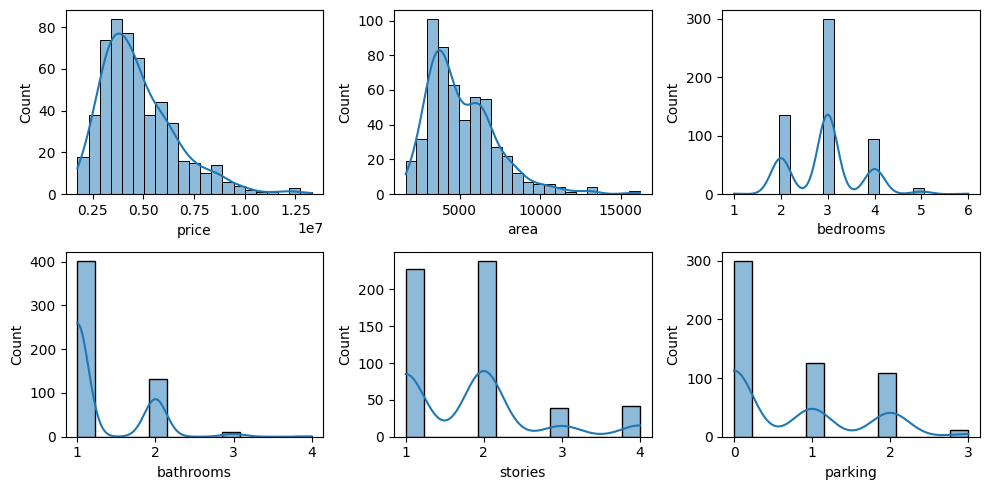

In [704]:
from sklearn import linear_model  # Import the linear model module from scikit-learn
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for advanced visualizations
from scipy import stats  # Import statistical functions from scipy
import numpy as np  # Import numpy for numerical operations

fig, axs = plt.subplots(2, 3, figsize=(10, 5))  # Create a 2x3 grid of subplots with a figure size of 10x5 inches
plt1 = sns.histplot(df['price'], kde=True, ax=axs[0, 0])  # Plot histogram with KDE for 'price' in the top-left subplot
plt2 = sns.histplot(df['area'], ax=axs[0, 1], kde=True)  # Plot histogram with KDE for 'area' in the top-center subplot
plt3 = sns.histplot(df['bedrooms'], ax=axs[0, 2], kde=True)  # Plot histogram with KDE for 'bedrooms' in the top-right subplot
plt1 = sns.histplot(df['bathrooms'], ax=axs[1, 0], kde=True)  # Plot histogram with KDE for 'bathrooms' in the bottom-left subplot
plt2 = sns.histplot(df['stories'], ax=axs[1, 1], kde=True)  # Plot histogram with KDE for 'stories' in the bottom-center subplot
plt3 = sns.histplot(df['parking'], ax=axs[1, 2], kde=True)  # Plot histogram with KDE for 'parking' in the bottom-right subplot
plt.tight_layout()  # Adjust the layout to prevent overlap of subplots


A commonly used rule says that a data point is an **outlier** if it is more than $1.5 \times {IQR}$ above the third quartile or below the first quartile.

Low outliers are below ${Q_1} - 1.5 \times {IQR}$ and high outliers are above ${Q_3} + 1.5 \times {IQR}$.

${IQR} = {Q_3} - {Q_1}$

$IQR$ = interquartile range

$Q_3$ = 3rd quartile or 75th percentile

$Q_1$ = 1st quartile or 25th percentile

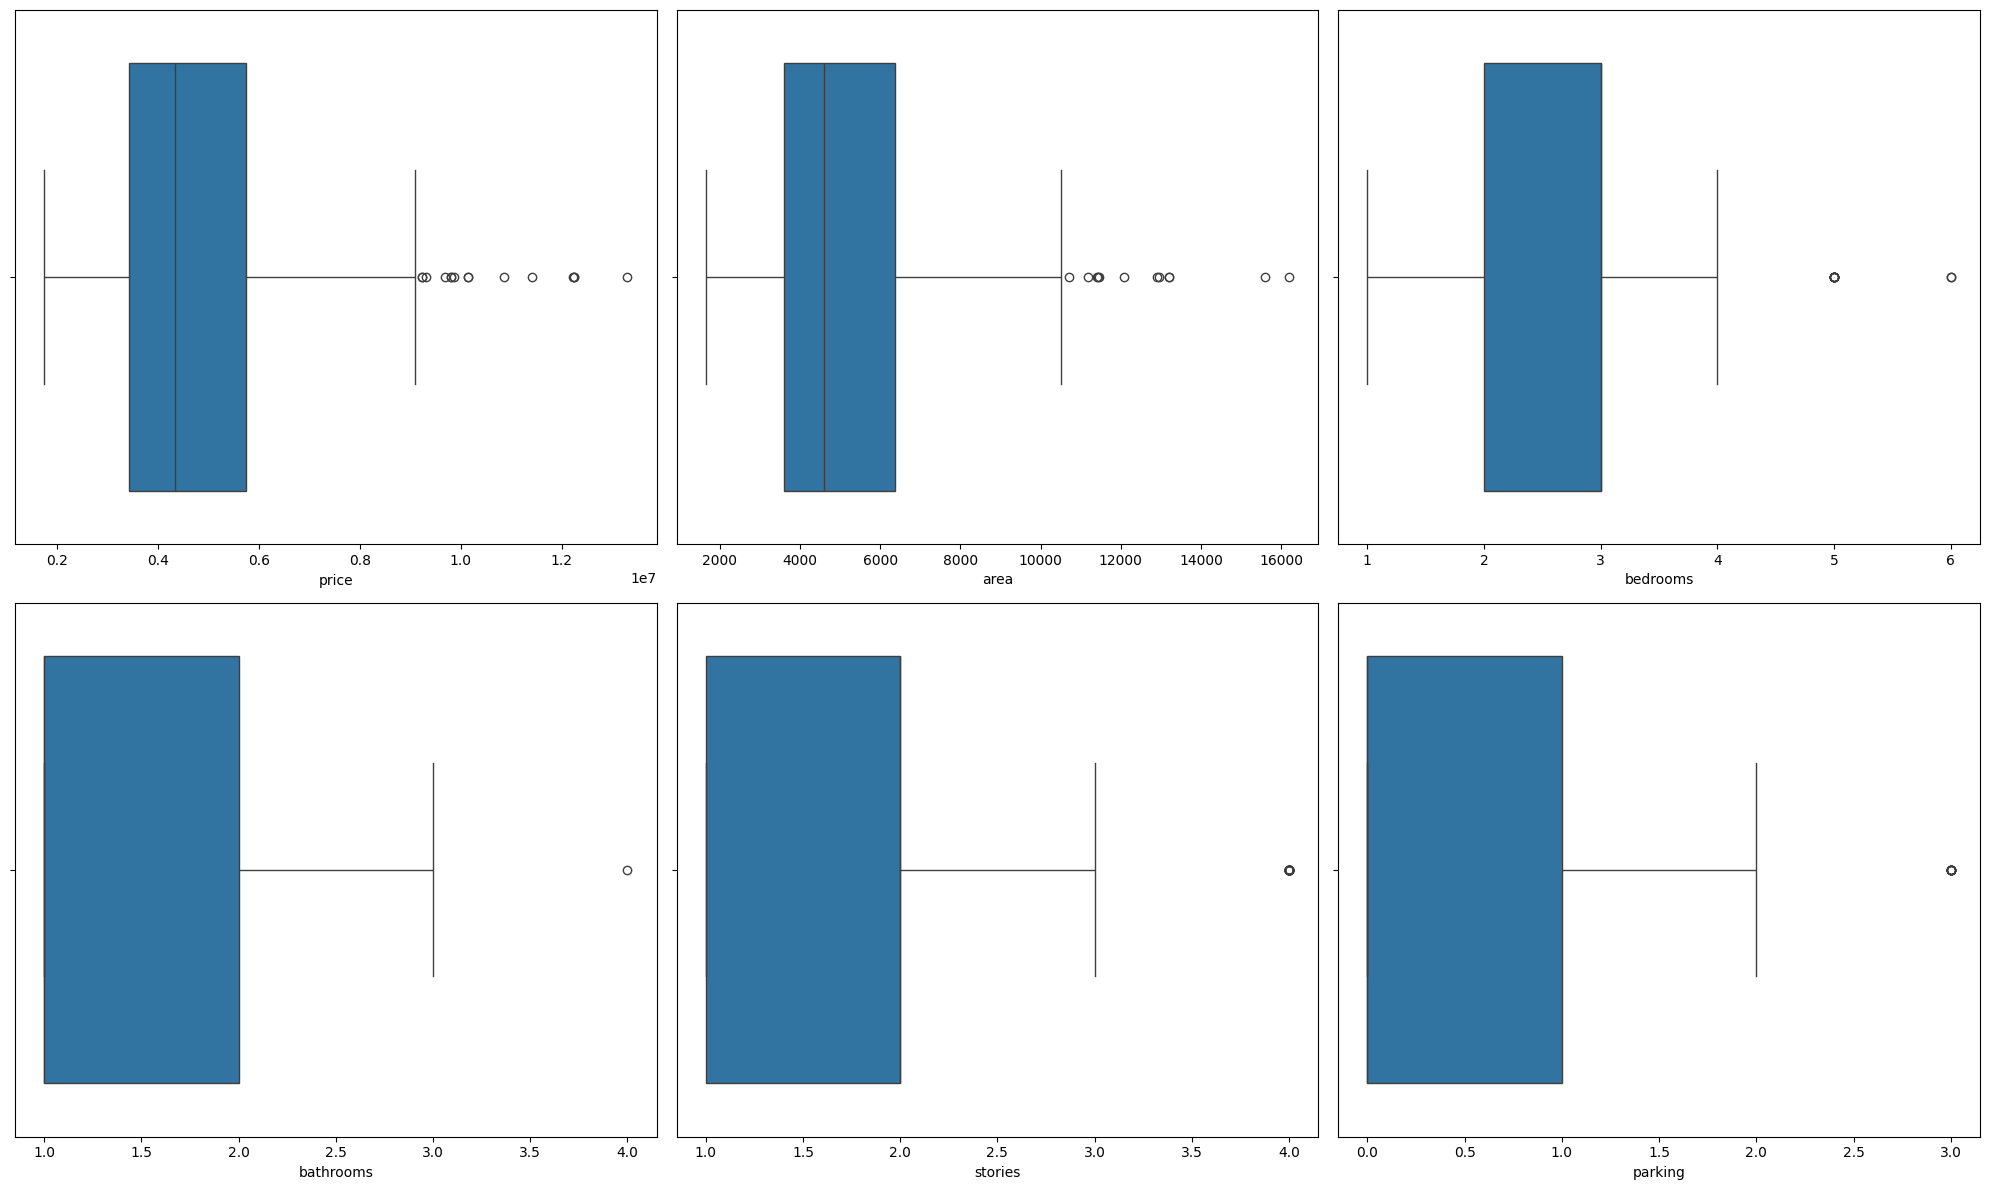

In [705]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))  # Create a 2x3 grid of subplots with a figure size of 20x12 inches
plt1 = sns.boxplot(x=df['price'], ax=axs[0, 0])  # Plot a boxplot for 'price' in the top-left subplot
plt2 = sns.boxplot(x=df['area'], ax=axs[0, 1])  # Plot a boxplot for 'area' in the top-center subplot
plt3 = sns.boxplot(x=df['bedrooms'], ax=axs[0, 2])  # Plot a boxplot for 'bedrooms' in the top-right subplot
plt1 = sns.boxplot(x=df['bathrooms'], ax=axs[1, 0])  # Plot a boxplot for 'bathrooms' in the bottom-left subplot
plt2 = sns.boxplot(x=df['stories'], ax=axs[1, 1])  # Plot a boxplot for 'stories' in the bottom-center subplot
plt3 = sns.boxplot(x=df['parking'], ax=axs[1, 2])  # Plot a boxplot for 'parking' in the bottom-right subplot
plt.tight_layout()  # Adjust the layout to prevent overlap of subplots


In [706]:
# count how many outliers are there in each column
def count_outliers(data, column):
    """
    Counts the number of outliers in a column of a DataFrame.

    Parameters:
    - data: pd.DataFrame, the dataset containing the column
    - column: str, the name of the column to analyze

    Returns:
    - int, the number of outliers
    """
    # Calculate quartiles and IQR
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    # Define outlier thresholds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print (f"lower_bound: {lower_bound}")
    print (f"upper_bound:{upper_bound}")
    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

In [707]:
# Count outliers in each column
columns_to_analyze = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
sum = 0
for i in range(len(columns_to_analyze)):
    column = columns_to_analyze[i]
    outlier_count = count_outliers(df, column)
    sum = sum + outlier_count
    print(f"Number of outliers in '{column}': {outlier_count}")
print(f"Total number of outliers and posiibly maximal rows will be removed from the dataset: {sum}")

lower_bound: -35000.0
upper_bound:9205000.0
Number of outliers in 'price': 15
lower_bound: -540.0
upper_bound:10500.0
Number of outliers in 'area': 12
lower_bound: 0.5
upper_bound:4.5
Number of outliers in 'bedrooms': 12
lower_bound: -0.5
upper_bound:3.5
Number of outliers in 'bathrooms': 1
lower_bound: -0.5
upper_bound:3.5
Number of outliers in 'stories': 41
lower_bound: -1.5
upper_bound:2.5
Number of outliers in 'parking': 12
Total number of outliers and posiibly maximal rows will be removed from the dataset: 93


In [708]:

def remove_outliers(data, columns):
    """
    Removes outliers from specified columns of a DataFrame.

    Parameters:
    - data: pd.DataFrame, the dataset containing the columns
    - columns: list of str, the names of the columns to clean

    Returns:
    - pd.DataFrame, the DataFrame with outliers removed
    """
    non_outliers_mask = pd.Series(True, index=data.index)
    
    for column in columns:
        # Calculate quartiles and IQR
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1

        # Define outlier thresholds
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        column_outliers_mask = (data[column] >= lower_bound) & (data[column] <= upper_bound)
        non_outliers_mask &= column_outliers_mask

    # Apply the mask to the DataFrame
    cleaned_data = data[non_outliers_mask]
    print(f"Number of rows removed: {len(data) - len(cleaned_data)}")
    
    return cleaned_data

# Columns to clean
columns_to_clean = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Remove outliers from the specified columns
cleaned_data = remove_outliers(df, columns_to_clean)

# Display cleaned data
print(cleaned_data)


Number of rows removed: 82
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15   9100000  6000         4          1        2      yes        no      yes   
16   9100000  6600         4          2        2      yes       yes      yes   
18   8890000  4600         3          2        2      yes       yes       no   
19   8855000  6420         3          2        2      yes        no       no   
20   8750000  4320         3          1        2      yes        no      yes   
..       ...   ...       ...        ...      ...      ...       ...      ...   
540  1820000  3000         2          1        1      yes        no      yes   
541  1767150  2400         3          1        1       no        no       no   
542  1750000  3620         2          1        1      yes        no       no   
543  1750000  2910         3          1        1       no        no       no   
544  1750000  3850         3          1        2      yes        no       no   

    hotwater

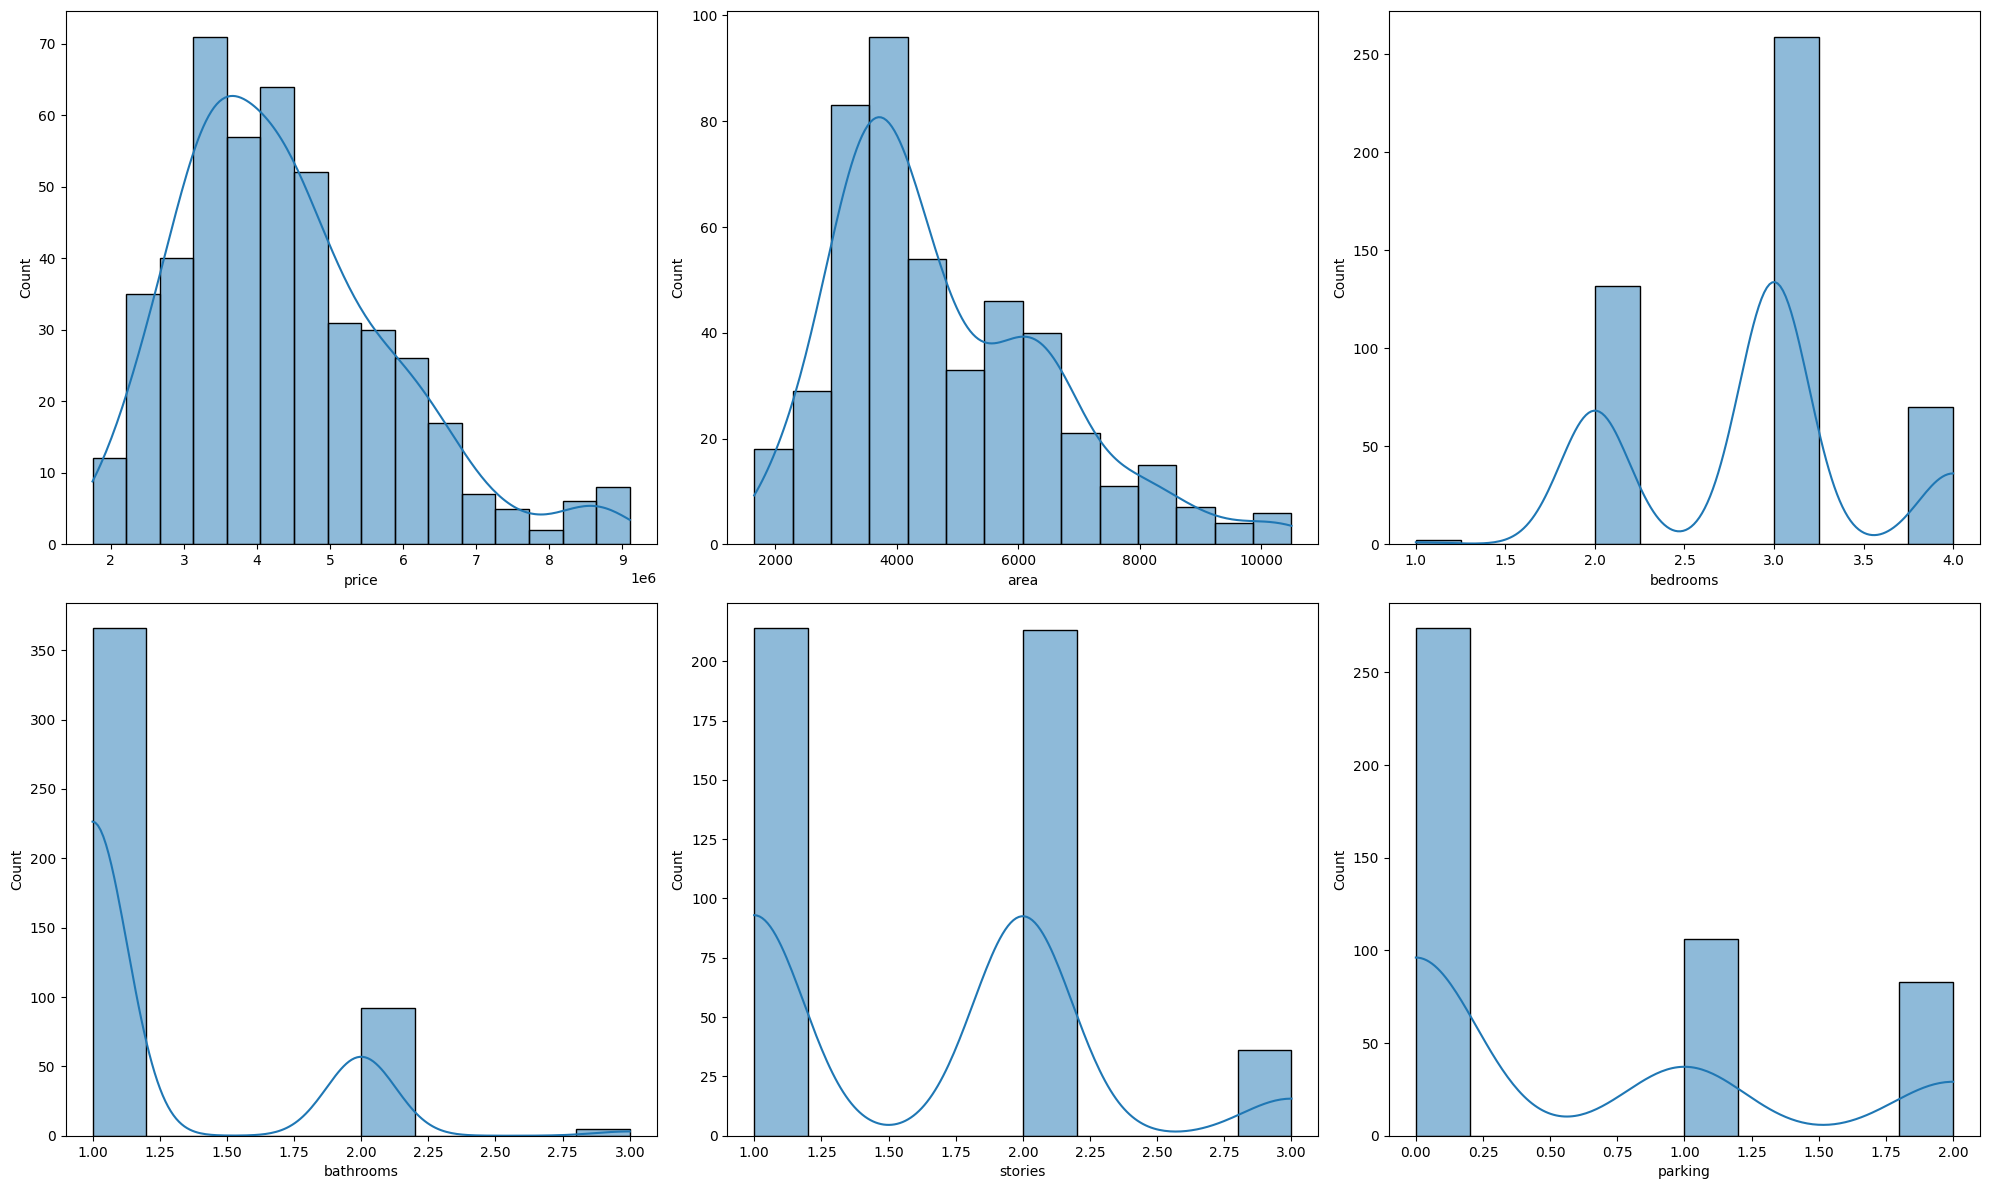

In [709]:
# plot after clenning the data
fig, axs = plt.subplots(2, 3, figsize=(20, 12))  # Create a 2x3 grid of subplots with a figure size of 20x12 inches
plt1 = sns.histplot(cleaned_data['price'], kde=True, ax=axs[0, 0])  # Plot histogram with KDE for 'price' in the top-left subplot
plt2 = sns.histplot(cleaned_data['area'], ax=axs[0, 1], kde=True)  # Plot histogram with KDE for 'area' in the top-center subplot
plt3 = sns.histplot(cleaned_data['bedrooms'], ax=axs[0, 2], kde=True)  # Plot histogram with KDE for 'bedrooms' in the top-right subplot
plt1 = sns.histplot(cleaned_data['bathrooms'], ax=axs[1, 0], kde=True)  # Plot histogram with KDE for 'bathrooms' in the bottom-left subplot
plt2 = sns.histplot(cleaned_data['stories'], ax=axs[1, 1], kde=True)  # Plot histogram with KDE for 'stories' in the bottom-center subplot
plt3 = sns.histplot(cleaned_data['parking'], ax=axs[1, 2], kde=True)  # Plot histogram with KDE for 'parking' in the bottom-right subplot
plt.tight_layout()  # Adjust the layout to prevent overlap of subplots


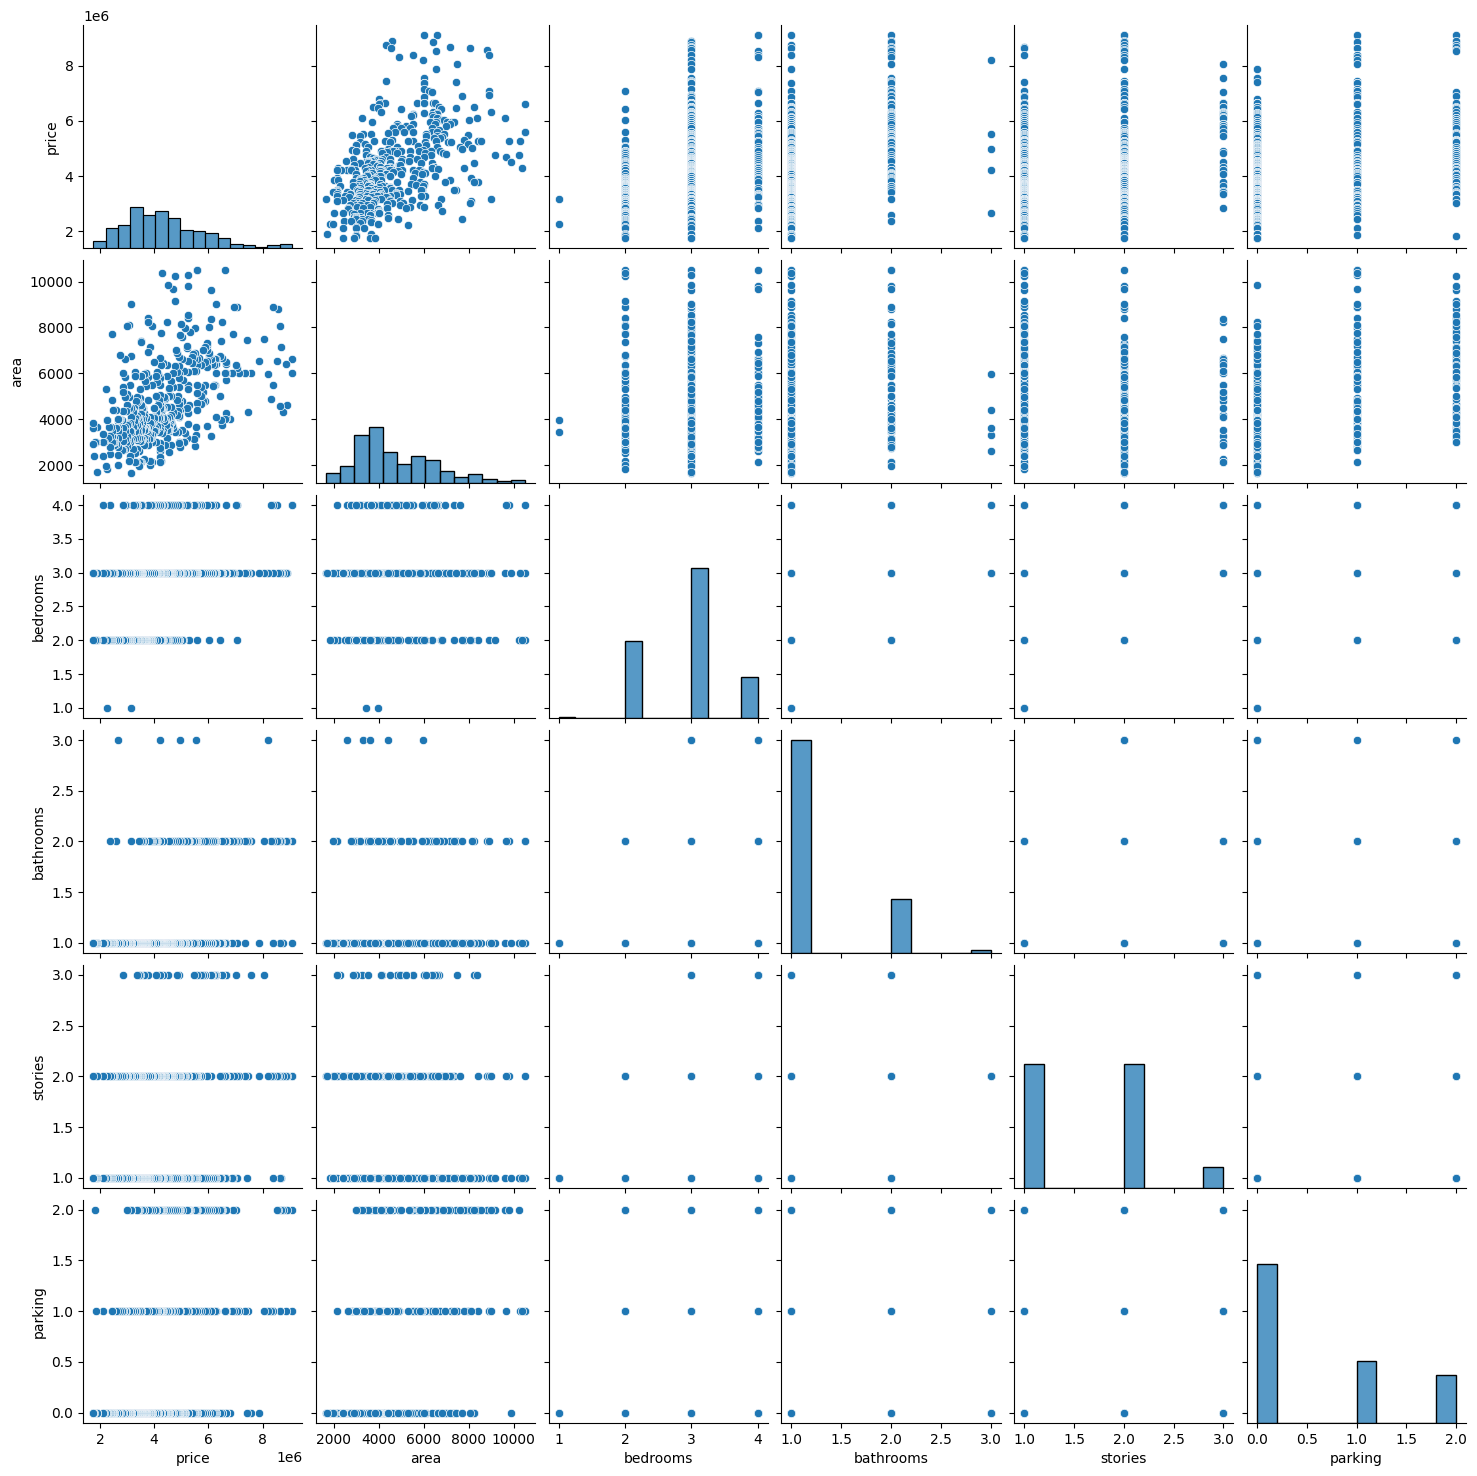

In [710]:
sns.pairplot(cleaned_data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])  
# Create pairwise scatterplots and histograms for selected features
plt.show()  
# Display the pairplot


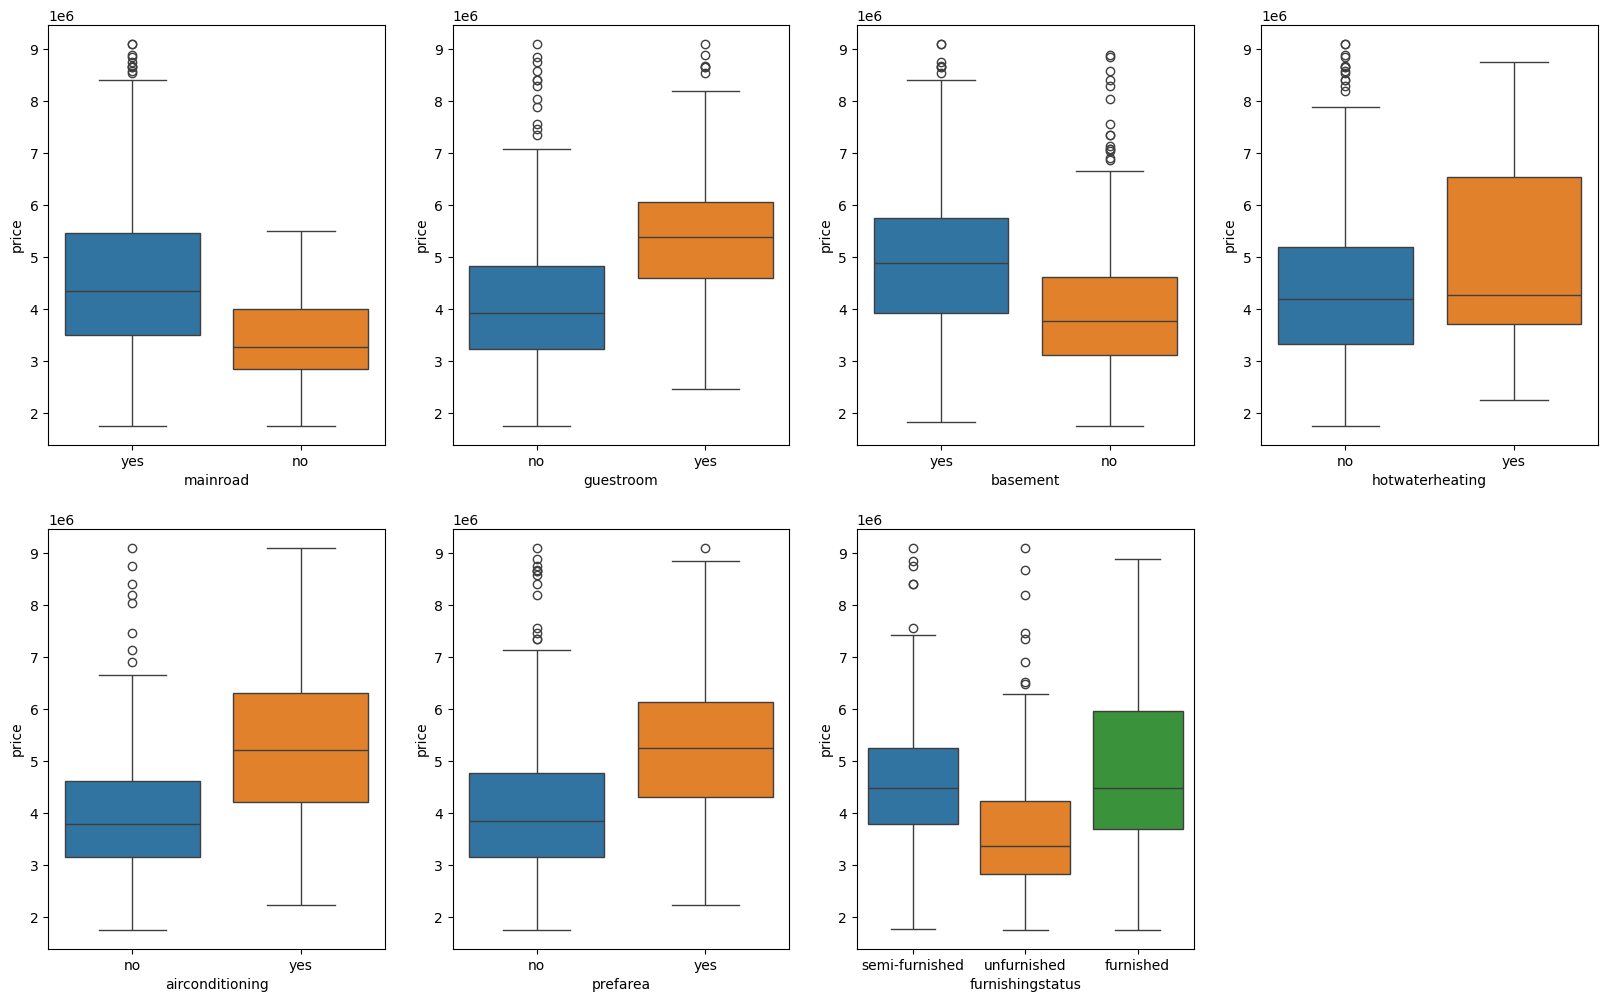

In [711]:
sns.color_palette()  # Display the current color palette (this line alone does not affect the plot)
plt.figure(figsize=(20, 12))  # Set the figure size to 20x12 inches

plt.subplot(2, 4, 1)  # Create the first subplot in a 2x4 grid
sns.boxplot(x='mainroad', y='price', data=cleaned_data, hue='mainroad')  # Boxplot of 'price' vs 'mainroad' with hue based on 'mainroad'

plt.subplot(2, 4, 2)  # Create the second subplot in a 2x4 grid
sns.boxplot(x='guestroom', y='price', data=cleaned_data, hue='guestroom')  # Boxplot of 'price' vs 'guestroom' with hue based on 'guestroom'

plt.subplot(2, 4, 3)  # Create the third subplot in a 2x4 grid
sns.boxplot(x='basement', y='price', data=cleaned_data, hue='basement')  # Boxplot of 'price' vs 'basement' with hue based on 'basement'

plt.subplot(2, 4, 4)  # Create the fourth subplot in a 2x4 grid
sns.boxplot(x='hotwaterheating', y='price', data=cleaned_data, hue='hotwaterheating')  # Boxplot of 'price' vs 'hotwaterheating' with hue based on 'hotwaterheating'

plt.subplot(2, 4, 5)  # Create the fifth subplot in a 2x4 grid
sns.boxplot(x='airconditioning', y='price', data=cleaned_data, hue='airconditioning')  # Boxplot of 'price' vs 'airconditioning' with hue based on 'airconditioning'

plt.subplot(2, 4, 6)  # Create the sixth subplot in a 2x4 grid
sns.boxplot(x='prefarea', y='price', data=cleaned_data, hue='prefarea')  # Boxplot of 'price' vs 'prefarea' with hue based on 'prefarea'

plt.subplot(2, 4, 7)  # Create the seventh subplot in a 2x4 grid
sns.boxplot(x='furnishingstatus', y='price', data=cleaned_data, hue='furnishingstatus')  # Boxplot of 'price' vs 'furnishingstatus' with hue based on 'furnishingstatus'

plt.show()  # Display all the subplots


In [712]:
# List of categorical variables to map binary values
cat = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining a function to map binary categorical values ('yes' and 'no') to 1 and 0
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Defining a function to map ternary categorical values ('furnished', 'semi-furnished', 'unfurnished') to 2, 1, and 0
def ternary_map(x):
    return x.map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

# Applying the binary mapping function to each column in the 'cat' list
for column in cat:
    cleaned_data[column] = binary_map(cleaned_data[column])

# Applying the ternary mapping function to the 'furnishingstatus' column
cleaned_data['furnishingstatus'] = ternary_map(cleaned_data['furnishingstatus'])

# Display the first few rows of the cleaned DataFrame to verify the changes
cleaned_data.head()


/var/folders/cs/27n8kxhs0jvfksnkcps78d1sl48yn2/T/ipykernel_76805/971851158.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[column] = binary_map(cleaned_data[column])
/var/folders/cs/27n8kxhs0jvfksnkcps78d1sl48yn2/T/ipykernel_76805/971851158.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[column] = binary_map(cleaned_data[column])
/var/folders/cs/27n8kxhs0jvfksnkcps78d1sl48yn2/T/ipykernel_76805/971851158.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,2
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,1


In [713]:
# Define the coefficients for each feature
coefficients = {
    'bedrooms': 0.36,
    'bathrooms': 0.41,
    'guestroom': 0.29,
    'basement': 0.31,
    'stories': 0.26
}

# Compute the Room Index (RI)
cleaned_data['RI'] = (
    cleaned_data['bedrooms'] * coefficients['bedrooms'] +
    cleaned_data['bathrooms'] * coefficients['bathrooms'] +
    cleaned_data['guestroom'] * coefficients['guestroom'] +
    cleaned_data['basement'] * coefficients['basement'] +
    cleaned_data['stories'] * coefficients['stories']
)

/var/folders/cs/27n8kxhs0jvfksnkcps78d1sl48yn2/T/ipykernel_76805/1757810959.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['RI'] = (


In [714]:
from sklearn.model_selection import train_test_split  # Import the train_test_split function for splitting data into training and testing sets

np.random.seed(0)  # Set the random seed to ensure reproducibility of the data split

# Split the cleaned_data DataFrame into training and testing sets
df_train, df_test = train_test_split(
    cleaned_data,        # The DataFrame to be split
    train_size=0.7,      # Proportion of the data to include in the training set (70%)
    test_size=0.3,       # Proportion of the data to include in the testing set (30%)
    random_state=100     # Seed for the random number generator to ensure reproducibility
)


In [715]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price','furnishingstatus', 'RI']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,RI
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.00000,324.000000,324.000000
mean,0.352009,0.347524,0.615226,0.109568,0.302469,0.827160,0.169753,0.376543,0.058642,0.234568,0.293210,0.20679,0.450617,0.436247
std,0.194429,0.199592,0.218104,0.221592,0.314057,0.378693,0.375996,0.485268,0.235317,0.424384,0.395975,0.40563,0.369963,0.211217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.209524,0.208475,0.333333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.286437
50%,0.332857,0.296045,0.666667,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.500000,0.396761
75%,0.471429,0.491525,0.666667,0.000000,0.500000,1.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.00000,0.500000,0.542510
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


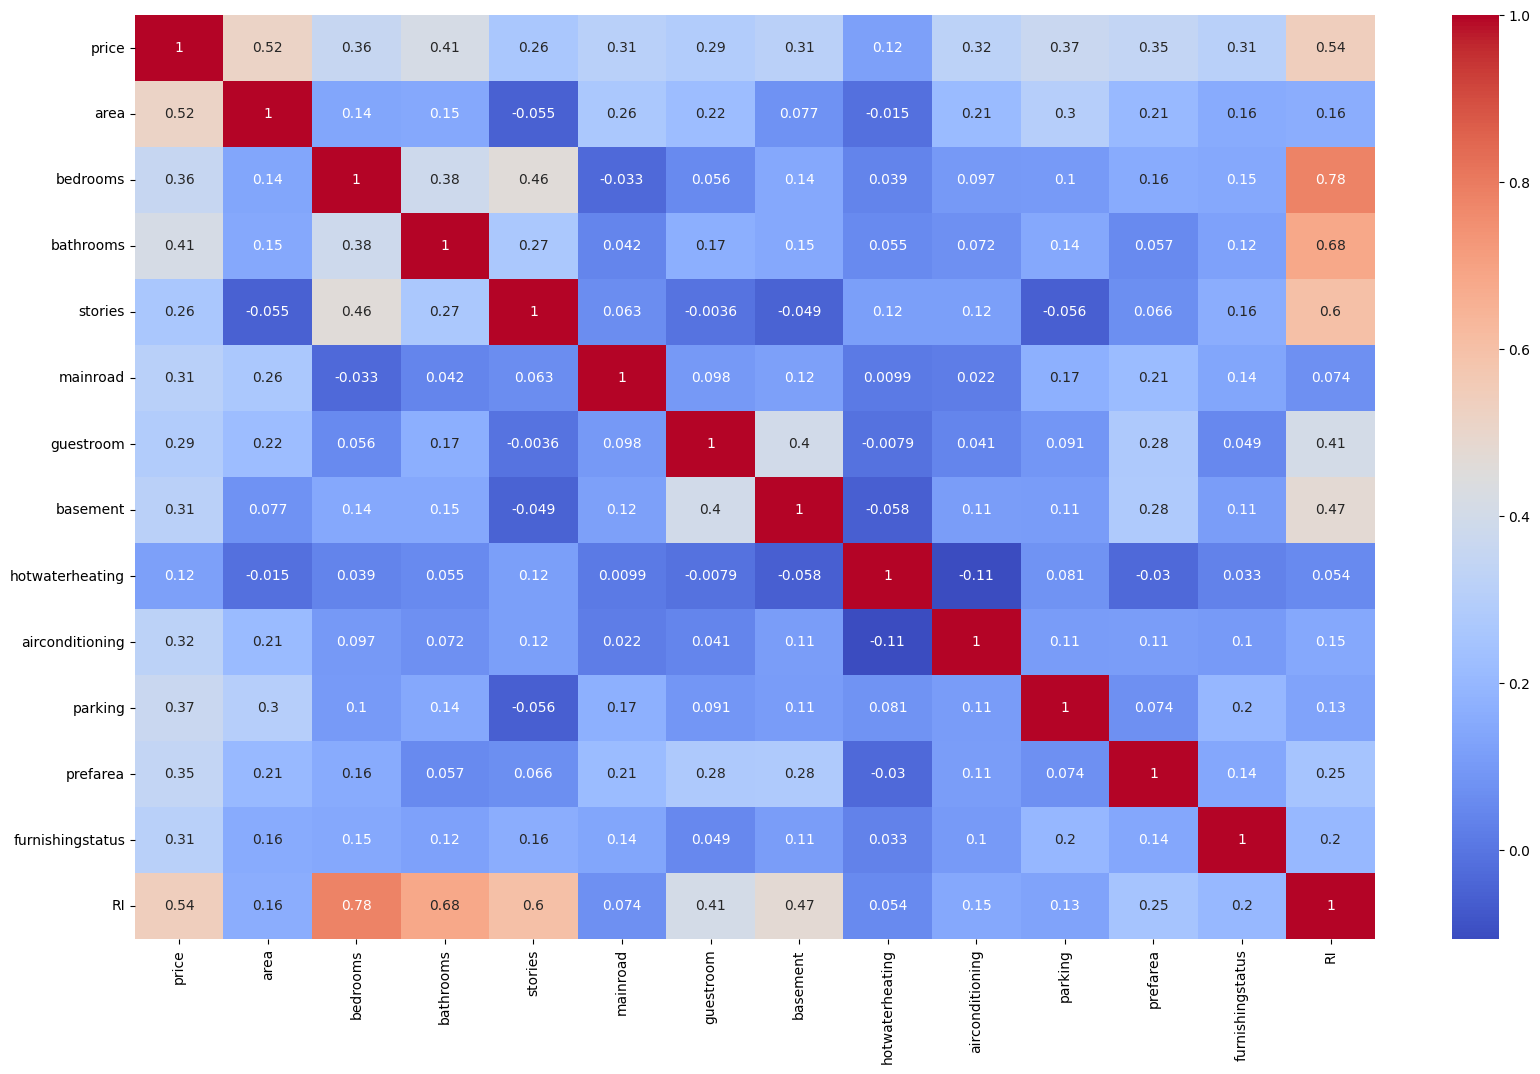

In [716]:
plt.figure(figsize=(20, 12))  # Set the figure size to 20x12 inches

# Create a heatmap of the correlation matrix for the training data
sns.heatmap(
    df_train.corr(),         # Compute and visualize the correlation matrix of the training DataFrame
    annot=True,              # Display the correlation coefficients in the heatmap
    cmap="coolwarm"          # Use the 'coolwarm' colormap to show correlations with different colors
)

plt.show()  # Display the heatmap


In [717]:
y_train = df_train.pop('price')  # Remove the 'price' column from df_train and assign it to y_train (target variable)
df_train.pop('stories')
df_train.pop('bathrooms')
df_train.pop('bedrooms')
df_train.pop('basement')
df_train.pop('guestroom')
X_train = df_train  # Assign the remaining columns of df_train to X_train (features)

y_train.shape  # Display the shape of the y_train array to verify its dimensions


(324,)

In [718]:
X_train.describe()  # Provide summary statistics of the features in the training set


,area,mainroad,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,RI
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.00000,324.000000,324.000000
mean,0.347524,0.827160,0.058642,0.234568,0.293210,0.20679,0.450617,0.436247
std,0.199592,0.378693,0.235317,0.424384,0.395975,0.40563,0.369963,0.211217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.208475,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.286437
50%,0.296045,1.000000,0.000000,0.000000,0.000000,0.00000,0.500000,0.396761
75%,0.491525,1.000000,0.000000,0.000000,0.500000,0.00000,0.500000,0.542510
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [719]:
from sklearn.feature_selection import RFE  # Import Recursive Feature Elimination (RFE) for feature selection
from sklearn.linear_model import LinearRegression  # Import Linear Regression model

lm = LinearRegression()  # Create an instance of the Linear Regression model
lm.fit(X_train, y_train)  # Fit the Linear Regression model to the training data

print(lm.coef_)  # Print the coefficients of the features in the trained model

[0.28991444 0.0679465  0.08922118 0.08059959 0.07288728 0.05779752
 0.0527483  0.34728379]


In [720]:
rfe = RFE(lm, n_features_to_select=4)   
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('mainroad', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', False, 2),
 ('parking', False, 3),
 ('prefarea', False, 4),
 ('furnishingstatus', False, 5),
 ('RI', True, 1)]

In [721]:
col = X_train.columns[rfe.support_]  # Get the names of the features that were selected by RFE
col  # Display the selected feature names

Index(['area', 'mainroad', 'hotwaterheating', 'RI'], dtype='object')

In [722]:
X_train.columns[~rfe.support_]  
# Get the names of the features that were *not* selected by RFE


Index(['airconditioning', 'parking', 'prefarea', 'furnishingstatus'], dtype='object')

In [723]:
X_train_rfe = X_train[col] 
 # Create a new DataFrame with only the features selected by RFE


In [724]:
import statsmodels.api as sm  # Import the statsmodels library for statistical models

X_train_rfe = sm.add_constant(X_train_rfe)  # Add a constant (intercept) column to the features for OLS regression


In [725]:
lm = sm.OLS(y_train, X_train_rfe).fit()  
# Fit an Ordinary Least Squares (OLS) regression model to the training data with the selected features


In [726]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     83.93
Date:                Sun, 11 Aug 2024   Prob (F-statistic):           1.29e-48
Time:                        21:11:44   Log-Likelihood:                 187.86
No. Observations:                 324   AIC:                            -365.7
Df Residuals:                     319   BIC:                            -346.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0416      0.024     

In [727]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Import variance_inflation_factor for detecting multicollinearity

vif = pd.DataFrame()  # Create an empty DataFrame to store VIF results
X = X_train_rfe  # Use the DataFrame with the selected features and constant

vif['Features'] = X.columns  # Store the feature names in the DataFrame
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # Calculate the VIF for each feature
vif['VIF'] = round(vif['VIF'], 2)  # Round the VIF values to 2 decimal places
vif = vif.sort_values(by="VIF", ascending=False)  # Sort the DataFrame by VIF values in descending order

vif  # Display the DataFrame with features and their VIF values


,Features,VIF
0,const,10.33
1,area,1.10
2,mainroad,1.08
4,RI,1.03
3,hotwaterheating,1.00


When $R_i^2$ is equal to 0, and therefore, when VIF or tolerance is equal to 1, the ith independent variable is not correlated to the remaining ones, meaning that multicollinearity does not exist.
1

In general terms,

VIF equal to 1 = variables are not correlated
VIF between 1 and 5 = variables are moderately correlated 
VIF greater than 5 = variables are highly correlated

In [728]:
y_train_price = lm.predict(X_train_rfe)

In [729]:
res = (y_train_price - y_train)

In [730]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/var/folders/cs/27n8kxhs0jvfksnkcps78d1sl48yn2/T/ipykernel_76805/2089857793.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)


Text(0.5, 0, 'Errors')

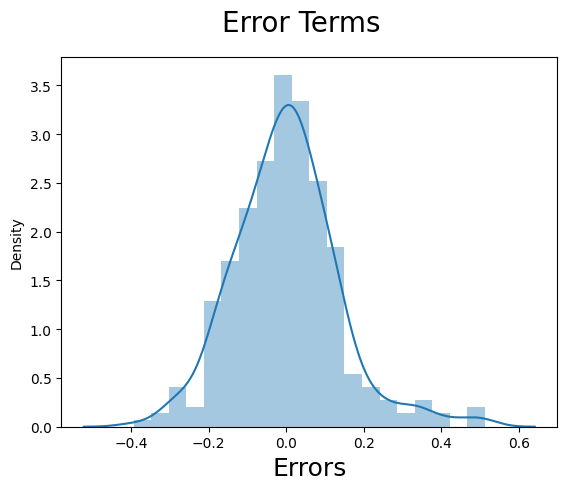

In [731]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

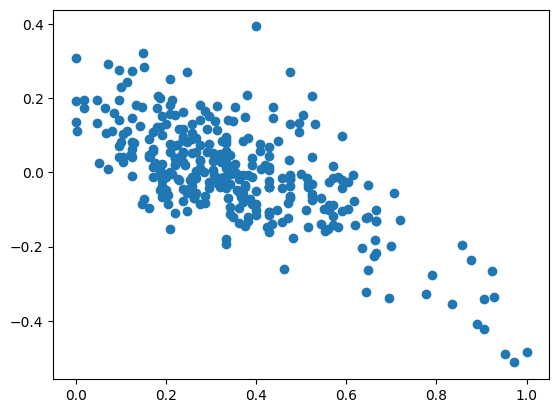

In [732]:
plt.scatter(y_train,res)
plt.show()

In [733]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price', 'RI']

In [734]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])  
# Apply the same MinMax scaling to the test data as was applied to the training data


In [735]:
y_test = df_test.pop('price')
X_test = df_test

In [736]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [737]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

In [738]:
# Making predictions
y_pred = lm.predict(X_test_rfe)

In [739]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.48930146475446334

Text(0, 0.5, 'y_pred')

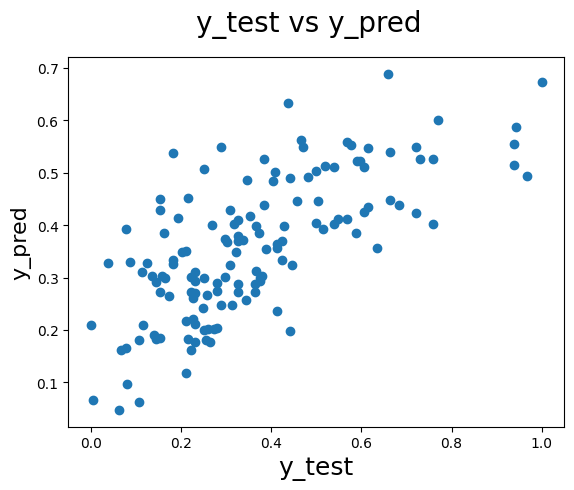

In [740]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

$price = 0.37  \times  area + 0.22  \times  bathrooms + 0.13 \times stories+ 0.06 \times hotwaterheating + 0.10 \times parking + 0.11 \times prefarea + 0.1047$ 

Perform paired-wise chi-square across all the catergorical variables, bath-bed, bed-stories, basement - guest room

In [741]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# List of variables to test pairwise
variables = ['bathrooms', 'bedrooms', 'stories', 'basement','guestroom']

# Function to compute chi-squared test for a pair of variables
def chi2_test_pair(var1, var2):
    contingency_table = pd.crosstab(cleaned_data[var1], cleaned_data[var2])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return chi2, p

# Perform pairwise chi-squared tests
results = {}
for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        chi2, p = chi2_test_pair(var1, var2)
        results[(var1, var2)] = {'chi2': chi2, 'p-value': p}

# Display results
for pair, result in results.items():
    print(f'Chi-squared test between {pair[0]} and {pair[1]}:')
    print(f"  Chi-squared: {result['chi2']:.4f}"+f"  p-value: {result['p-value']:.4f}")
    print()


Chi-squared test between bathrooms and bedrooms:
  Chi-squared: 59.4527  p-value: 0.0000

Chi-squared test between bathrooms and stories:
  Chi-squared: 22.8160  p-value: 0.0001

Chi-squared test between bathrooms and basement:
  Chi-squared: 16.0210  p-value: 0.0003

Chi-squared test between bathrooms and guestroom:
  Chi-squared: 12.5423  p-value: 0.0019

Chi-squared test between bedrooms and stories:
  Chi-squared: 136.2341  p-value: 0.0000

Chi-squared test between bedrooms and basement:
  Chi-squared: 13.1206  p-value: 0.0044

Chi-squared test between bedrooms and guestroom:
  Chi-squared: 3.7220  p-value: 0.2931

Chi-squared test between stories and basement:
  Chi-squared: 10.8949  p-value: 0.0043

Chi-squared test between stories and guestroom:
  Chi-squared: 0.2783  p-value: 0.8701

Chi-squared test between basement and guestroom:
  Chi-squared: 75.5753  p-value: 0.0000



Create a Synthesis Variable by weighted by the correlation to the price.
$ Room Index (RI) = 0.36 \times bedrooms + 0.41 \times bathrooms + 0.29 \times guestroom + 0.31 \times basement + 0.26 \times stories$


$Price = 0.39  \times  area + 0.08 \times hotwaterheating + 0.09 \times mainroad + 0.48 \times RI - 0.0416$ 

$ Random Forest Approach $

In [745]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

reg=RandomForestRegressor()

reg.fit(X_train, y_train)

RandomForestRegressor()

In [746]:
y_pred=reg.predict(X_train)


In [747]:
# Model Evaluation for Random Forest
print("R^2",metrics.r2_score(y_train, y_pred))
print("Adusted R^2", 1-(1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print("MAE", metrics.mean_absolute_error(y_train, y_pred))
print("MSE", metrics.mean_squared_error(y_train, y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2 0.9324009006396744
Adusted R^2 0.9306840981162375
MAE 0.037636169900058775
MSE 0.002547533528066105
RMSE 0.05047309707226321


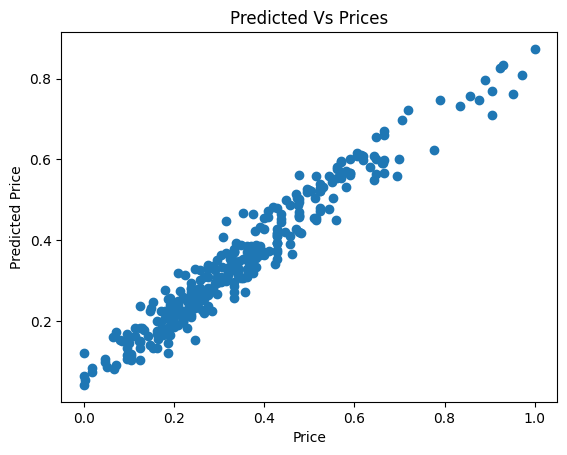

In [748]:
# visualize the difference between the actual and predicted price 
plt.scatter(y_train, y_pred)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Prices")
plt.show()

$XGBoostApproch$

In [750]:
from xgboost import XGBRegressor

xreg=XGBRegressor()

xreg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [751]:
y_pred=xreg.predict(X_train)


In [752]:
print("R^2",metrics.r2_score(y_train, y_pred))
print("Adusted R^2", 1-(1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print("MAE", metrics.mean_absolute_error(y_train, y_pred))
print("MSE", metrics.mean_squared_error(y_train, y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2 0.9963223511349842
Adusted R^2 0.9962289505288886
MAE 0.004604334261900552
MSE 0.0001385955416083646
RMSE 0.011772660770121792


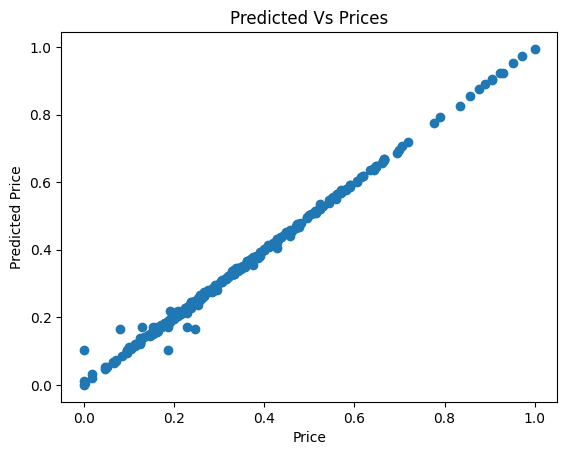

In [753]:
# visualize the difference between the actual and predicted price 
plt.scatter(y_train, y_pred)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Prices")
plt.show()

$SupportVectorMachineApproach$

In [757]:
from sklearn import svm

regSVM=svm.SVR()

In [758]:
regSVM.fit(X_train,y_train)


SVR()

In [759]:
y_pred=regSVM.predict(X_train)


In [760]:
# Model Evaluation for Random Forest
print("R^2",metrics.r2_score(y_train, y_pred))
print("Adusted R^2", 1-(1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print("MAE", metrics.mean_absolute_error(y_train, y_pred))
print("MSE", metrics.mean_squared_error(y_train, y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2 0.6892054917627609
Adusted R^2 0.6813122979027675
MAE 0.0835248837542667
MSE 0.01171257365209622
RMSE 0.10822464438424466


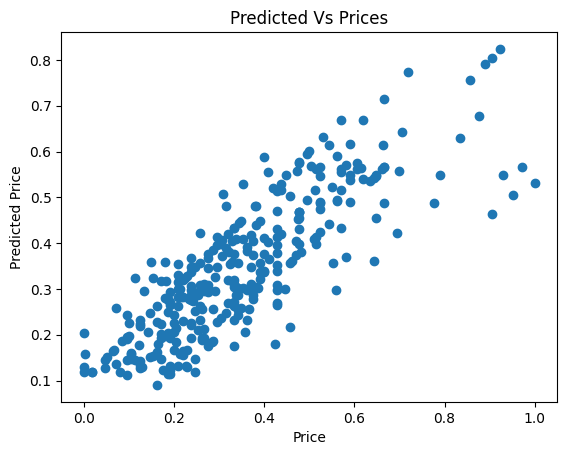

In [761]:
plt.scatter(y_train, y_pred)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Prices")
plt.show()